In [1]:
import numpy as n
import pandas as pd
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys
import os

sys.path.append("../../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *


In [2]:
#grid
sx = 1.5
sy = 1.5
sz = .12
x0 = 0
y0 = 0
z0 = -15
nx = 168
ny = 84
nz = 84
x1 = x0 + nx*sx
y1 = y0 + ny*sy
z1 = z0 + nz*sz

dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

# domain = np.ones([ny,nx],dtype=bool)
# domain[: 5]= 0
# plt.imshow(domain)

In [3]:
## create pile

P1 = Pile(name = "P1",seed=1)
PD = Pile(name = "PD",seed=1)

#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodelD1 = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[30,30]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[40,40]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodel_er = gcm.CovModel2D(elem=[('spherical', {'w':1, 'r':[50,50]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential", {"w":.21,"r":[50, 50, 10]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B1 = gcm.CovModel3D(elem=[("exponential", {"w":.16,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B2 = gcm.CovModel3D(elem=[("exponential", {"w":.24,"r":[100, 100, 3]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B3 = gcm.CovModel3D(elem=[("exponential", {"w":.19,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B4 = gcm.CovModel3D(elem=[("exponential", {"w":.13,"r":[100, 100, 4]})], alpha=0, name="vario_SIS") # input variogram

lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the function
lst_covmodelB=[covmodel_SIS_B1, covmodel_SIS_B2, covmodel_SIS_B3, covmodel_SIS_B4] # list of covmodels to pass


#create Lithologies 
dic_s_D2 = {"int_method" : "grf_ineq","covmodel" : covmodelD1}
dic_f_D2 = {"f_method":"homogenous"}
D2 = Unit(name="D2",order=1,ID = 10,color="goldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D2),
          dic_facies=dic_f_D2)
dic_s_D1 = {"int_method" : "grf_ineq","covmodel" : covmodelD1, "mean":-6.5}
dic_f_D1 = {"f_method":"homogenous"}
D1 = Unit(name="D1",order=2,ID = 11,color="palegoldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D1)
            ,dic_facies=dic_f_D1)


PD.add_unit([D1,D2])

dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
# dic_f_D = {"f_method":"homogenous"}
dic_f_D = {"f_method":"SubPile", "SubPile":PD}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "grf_ineq","covmodel" : covmodelC, "mean":-6.5}
dic_f_C = {"f_method" : "SIS","neig" : 10, "f_covmodel":lst_covmodelC, "probability":[0.3, 0.7]}
C = Unit(name="C", order=2, ID = 2, color="blue", contact="onlap", dic_facies=dic_f_C, surface=Surface(dic_surf=dic_s_C, contact="onlap"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB, "mean":-8.5}
dic_f_B = {"f_method":"SIS", "neig" : 10, "f_covmodel":lst_covmodelB, "probability":[0.2, 0.4, 0.25, 0.15]}
B = Unit(name="B",order=3,ID = 3,color="purple",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelB, "mean":-11}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

Unit D2: Surface added for interpolation
Unit D1: Surface added for interpolation
Stratigraphic unit D1 added
Stratigraphic unit D2 added
Unit D: Surface added for interpolation
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added
Stratigraphic unit C added
Stratigraphic unit B added
Stratigraphic unit A added


In [4]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[30,30,10]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[20,20, 5]})],alpha=0,name="K_vario_2")

facies_1 = Facies(ID = 1,name="Sand",color="yellow")
facies_2 = Facies(ID = 2,name="Gravel",color="lightgreen")
facies_3 = Facies(ID = 3,name="GM",color="blueviolet")
facies_4 = Facies(ID = 4,name="Clay",color="blue")
facies_5 = Facies(ID = 5,name="SM",color="brown")
facies_6 = Facies(ID = 6,name="Silt",color="goldenrod")
facies_7 = Facies(ID = 7,name="basement",color="red")

A.add_facies([facies_7])
B.add_facies([facies_1, facies_2, facies_3, facies_5])
D.add_facies([facies_1])
D1.add_facies([facies_1])
D2.add_facies([facies_5])
C.add_facies([facies_4, facies_6])

# property model
cm_prop1 = gcm.CovModel3D(elem = [("spherical", {"w":0.1, "r":[10,10,10]}),
                                  ("cubic", {"w":0.1, "r":[15,15,15]})])
cm_prop2 = gcm.CovModel3D(elem = [("cubic", {"w":0.2, "r":[25, 25, 5]})])

list_facies = [facies_1, facies_2, facies_3, facies_4, facies_5, facies_6, facies_7]
list_covmodels = [cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2]
means = [-4, -2, -6, -9, -6, -7, -19]
prop_model = ArchPy.base.Prop("K",
                              facies = list_facies,
                              covmodels = list_covmodels,
                                means = means,
                                int_method = "sgs",
                                vmin = -10,
                                vmax = -1
                                )



Facies basement added to unit A
Facies Sand added to unit B
Facies Gravel added to unit B
Facies GM added to unit B
Facies SM added to unit B
Facies Sand added to unit D
Facies Sand added to unit D1
Facies SM added to unit D2
Facies Clay added to unit C
Facies Silt added to unit C


In [5]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [6]:
T1 = Arch_table(name = "P1",seed=3)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot)
T1.add_prop(prop_model)

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
Property K added


In [7]:
T1.compute_surf(1)
T1.compute_facies(1)
T1.compute_prop(1)

Boreholes not processed, fully unconditional simulations will be tempted
########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.03986835479736328 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.03390955924987793 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.035903215408325195 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.1186823844909668 s
##########################

########## PILE PD ##########
Pile PD: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT D1
D1: time elapsed for computing surface 0.03490614891052246 s

#### COMPUTING SURFACE OF UNIT D2
D2: time elapsed for computing surface 0

In [8]:
pv.set_jupyter_backend("static")

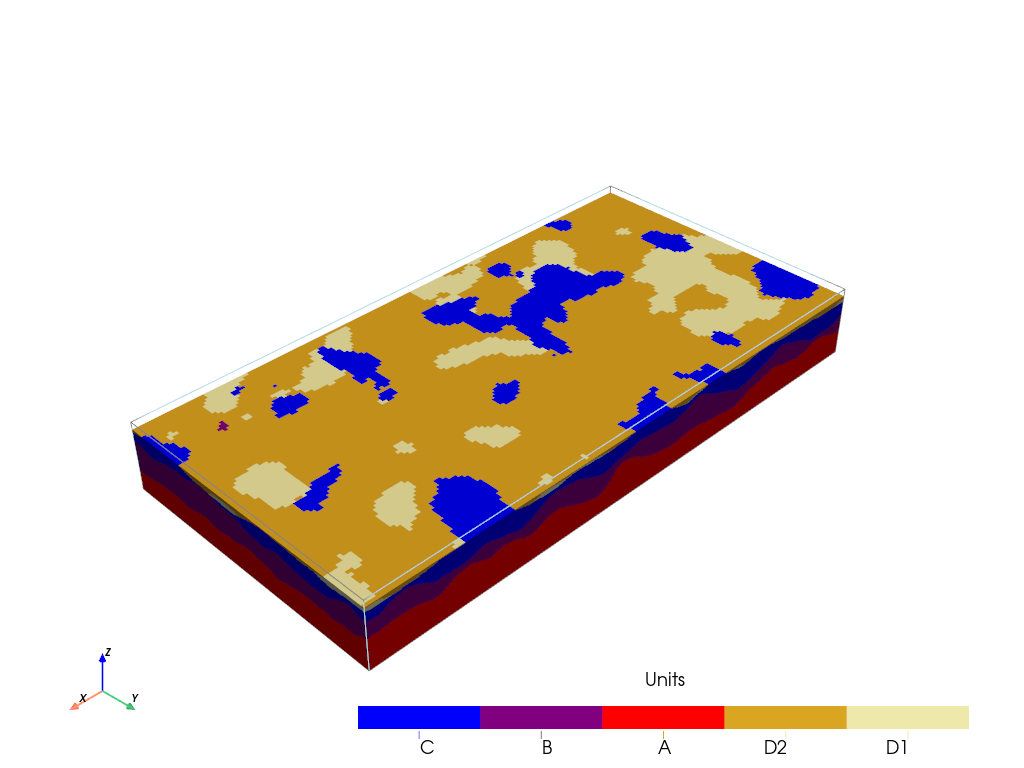

In [9]:
T1.plot_units(v_ex=3)

In [10]:
# T1.plot_facies(v_ex=3)

In [11]:
# T1.plot_prop("K", v_ex=3)

In [12]:
# val = T1.get_prop("K")[0, 0, 0]
# im = geone.img.Img(nx=nx, ny=ny, nz=nz, sx=sx, sy=sy, sz=sz, ox=x0, oy=y0, oz=z0, nv=1, val=val)

In [13]:
import flopy as fp
import ArchPy.ap_mf
from ArchPy.ap_mf import archpy2modflow, array2cellids

how to compare pathlines using different grid mode ?

- compute distance between the two pathlines (optimal transport, frechet distance)
- difference between time and distance traveled
- compare facies encountered (but how ?)
- compare units encountered

## Comparisons

In [14]:
def add_chd(archpy_flow, h1=100, h2=0):

    # add BC at left and right on all layers
    chd_data = []

    gwf = archpy_flow.get_gwf()
    
    a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
    a[:, :, 0] = 1
    lst_chd = array2cellids(a, gwf.dis.idomain.array)
    for cellid in lst_chd:
        chd_data.append((cellid, h1))

    a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
    a[:, :, -1] = 1
    lst_chd = array2cellids(a, gwf.dis.idomain.array)
    for cellid in lst_chd:
        chd_data.append((cellid, h2))

    chd = fp.mf6.ModflowGwfchd(gwf, stress_period_data=chd_data, save_flows=True)

In [15]:
from scipy.spatial import distance
from numba import jit
@jit()
def DTW(path1, path2, dist):
    """
    Compute the Frechet distance between two pathlines
    """
    
    # compute the distance between each point of the two pathlines
    # dist = distance.cdist(path1, path2)

    # compute frechet matrix
    MF = np.zeros(dist.shape)
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if i == 0 and j == 0:
                MF[i, j] = dist[i, j]
            elif i == 0:
                MF[i, j] = dist[i, j]
            elif j == 0:
                MF[i, j] = dist[i, j]
            else:
                MF[i, j] = dist[i, j] + min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1])

    return MF[-1, -1]
    
def frechet_distance(path1, path2):

    # compute the distance between each point of the two pathlines
    dist = distance.cdist(path1, path2)

    # compute frechet matrix
    MF = np.zeros(dist.shape)
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if i == 0 and j == 0:
                MF[i, j] = dist[i, j]
            elif i == 0:
                MF[i, j] = max(MF[i, j-1], dist[i, j])
            elif j == 0:
                MF[i, j] = max(MF[i-1, j], dist[i, j])
            else:
                MF[i, j] = max(min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1]), dist[i, j])
    
    return MF[-1, -1]

def hausdorff_distance(path1, path2):
    """
    Compute the Hausdorff distance between two pathlines
    """
    
    from scipy.spatial.distance import directed_hausdorff

    d1 = directed_hausdorff(path1, path2)
    return d1[0]

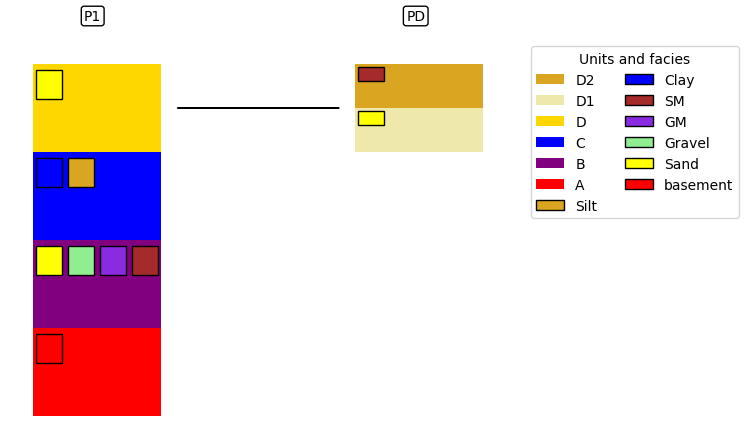

In [16]:
T1.plot_pile()

In [17]:
T1.get_sp(unit_kws=["mean", "covmodel"], facies_kws=["probability"])[0]

,name,contact,int_method,mean,covmodel,filling_method,list_facies,probability
0,D,onlap,grf_ineq,nan,"0: cub (w: 0.6, r: [30, 30])",SubPile,[Sand],None
1,C,onlap,grf_ineq,-6.500000,"0: cub (w: 0.2, r: [40, 40])",SIS,"[Clay, Silt]","[0.3, 0.7]"
2,B,onlap,grf_ineq,-8.500000,"0: cub (w: 0.6, r: [30, 30])",SIS,"[Sand, Gravel, GM, SM]","[0.2, 0.4, 0.25, 0.15]"
3,A,onlap,grf_ineq,-11.000000,"0: cub (w: 0.6, r: [30, 30])",homogenous,[basement],None
4,D2,onlap,grf_ineq,nan,"0: cub (w: 0.2, r: [30, 30])",homogenous,[SM],None
5,D1,onlap,grf_ineq,-6.500000,"0: cub (w: 0.2, r: [30, 30])",homogenous,[Sand],None


In [19]:
T1.get_sp(unit_kws=["mean", "covmodel"], facies_kws=["probability"])[1]

,name,property,mean,covmodels
0,Sand,K,-4,"0: cub (w: 0.2, r: [25, 25, 5])"
1,SM,K,-6,"0: cub (w: 0.2, r: [25, 25, 5])"
2,Clay,K,-9,"0: sph (w: 0.1, r: [10, 10, 10]) 1: cub (w: 0.1, r: [15, 15, 15])"
3,Silt,K,-7,"0: sph (w: 0.1, r: [10, 10, 10]) 1: cub (w: 0.1, r: [15, 15, 15])"
4,Gravel,K,-2,"0: sph (w: 0.1, r: [10, 10, 10]) 1: cub (w: 0.1, r: [15, 15, 15])"
5,GM,K,-6,"0: cub (w: 0.2, r: [25, 25, 5])"
6,basement,K,-19,"0: cub (w: 0.2, r: [25, 25, 5])"


In [ ]:
def full_script(T1, grid_modes, mode_names, factor_x, factor_y, factor_z, iu=0, ifa=0, ip=0, n_loc=100, 
                modflow_path = "mf6.exe", experience_name="test1", compute=True, plot_results=True):
    
    # create results folder
    if not os.path.exists(f"results/{experience_name}"):
        os.makedirs(f"results/{experience_name}")

    # write a txt file to resume the experience
    with open(f"results/{experience_name}/resume.txt", "w") as f:
        f.write(f"Experience name: {experience_name}\n")
        f.write(f"grid_modes: {grid_modes}\n")
        f.write(f"mode_names: {mode_names}\n")
        f.write(f"factor_x: {factor_x}\n")
        f.write(f"factor_y: {factor_y}\n")
        f.write(f"factor_z: {factor_z}\n")
        f.write(f"number of boreholes: {len(T1.list_bhs)}\n")
        f.write(f"number of particles: {n_loc}\n")

    # plot pile and save it
    T1.plot_pile()
    plt.savefig(f"results/{experience_name}/pile.png")
    plt.close()

    # create a table with surface and facies parameters
    df_un, df_fa = T1.get_sp()
    df_un.to_excel(f"results/{experience_name}/units_params.xlsx")
    df_fa.to_excel(f"results/{experience_name}/facies_params.xlsx")

    # compute and create modflow models folders #
    l_archpy_flow_models = []
    for o in range(len(grid_modes)):
        grid_mode = grid_modes[o]
        print(f"grid_mode: {grid_mode}")
        model_name = "model"
        model_dir = f"workspace_{grid_mode}"

        try :
            int(grid_mode.split("_")[-1])
            grid_mode = "_".join(grid_mode.split("_")[:-1])
        except:
            pass

        archpy_flow = archpy2modflow(T1, exe_name=modflow_path, model_name=model_name, model_dir=model_dir)
        archpy_flow.create_sim(grid_mode=grid_mode, iu=iu, factor_x=factor_x[o], factor_y=factor_y[o], factor_z=factor_z[o])
        archpy_flow.set_k("K", iu, ifa, ip, log=True)

        sim = archpy_flow.get_sim()

        add_chd(archpy_flow, 100, 0)  # create some boundary conditions (fixed head on the left and right)

        sim.write_simulation()

        # ims
        if grid_mode == "archpy":
            sim.ims.complexity = "complex"
        else:
            sim.ims.complexity = "moderate"
        sim.ims.write()
        sim.run_simulation()

        l_archpy_flow_models.append(archpy_flow)
            
        
    # compute particle tracking #

    np.random.seed(1)

    particles_loc_x = np.random.uniform(100, T1.get_xg()[-1], n_loc)
    particles_loc_y = np.random.uniform(0, T1.get_yg()[-1], n_loc)
    particles_loc_z = np.random.uniform(-10.5, -6, n_loc)
    particles_loc = list(zip(particles_loc_x, particles_loc_y, particles_loc_z))

    l_df_pi = []
    for o in range(len(grid_modes)):

        archpy_flow_o = l_archpy_flow_models[o]
        # Particle Tracker mode #
        archpy_flow_o.prt_create(workspace="workspace_prt", list_p_coords=particles_loc, trackdir="backward")
        archpy_flow_o.prt_run()

        l = []
        for i in range(n_loc):
            l.append(archpy_flow_o.prt_get_facies_path_particle(i+1))

        # store results
        l_df_pi.append(l)

        # copy test.trk.csv file to results folder
        import shutil
        shutil.copy(f"workspace_prt/test.trk.csv", f"results/{experience_name}/test_{grid_modes[o]}.trk.csv")


    # compute metrics and results, save figures #

    # compare max distance and time
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))

    ax[1].set_title("Total distance traveled by the particles")

    for o in range(len(grid_modes)):
        ax[1].boxplot([l_df_pi[o][i].cum_distance.iloc[-1] for i in range(n_loc)], positions=[o])


    ax[0].title("Total time traveled by the particles")

    for o in range(len(grid_modes)):
        ax[0].boxplot([l_df_pi[o][i].time.iloc[-1] for i in range(n_loc)], positions=[o])

    # set y axis to log scale
    ax[0].set_yscale("log")

    plt.savefig(f"results/{experience_name}/distance_time_boxplot.png")
    plt.close()

    # compare distribution of max time and distance
    def kl_divergence(p, q):
        return np.sum(np.where(p != 0, p * np.log(p / q), 0))
    import scipy.stats as stats

    fig, ax = plt.subplots(2, 2, figsize=(15, 8))

    # TIME #
    for o in range(4):
        ax[0, 0].hist(np.log10([l_df_pi[o][i].time.iloc[-1] for i in range(n_loc)]), bins=20, alpha=0.5, label=grid_modes[o])

    ax[0, 0].set_xlabel("log10(time [d])")
    ax[0, 0].set_ylabel("count")

    # fit a kde to obtain probability distribution of each mode
    kde = []
    for o in range(4):
        kde.append(stats.gaussian_kde(np.log10([l_df_pi[o][i].time.iloc[-1] for i in range(n_loc)])))

    x = np.linspace(-2, 10, 2000)
    kl = []

    for o in range(1, 4):
        tot_kde = kde[o](x).sum()
        kl.append(kl_divergence(kde[0](x), kde[o](x)) / tot_kde)

    ax[1, 0].bar(grid_modes[1:], kl)
    ax[1, 0].set_ylabel("KL divergence")

    ax[0, 0].set_title("Time")
    ax[0, 1].set_title("Distance")

    # DISTANCE #
    for o in range(4):
        ax[0, 1].hist([l_df_pi[o][i].cum_distance.iloc[-1] for i in range(n_loc)], bins=20, alpha=0.5, label=grid_modes[o])

    ax[0, 1].set_xlabel("Distance [m]")
    ax[0, 1].set_ylabel("count")

    kde = []
    for o in range(4):
        kde.append(stats.gaussian_kde([l_df_pi[o][i].cum_distance.iloc[-1] for i in range(n_loc)]))

    x = np.linspace(0, 500, 2000)
    kl = []

    for o in range(1, 4):
        tot_kde = kde[o](x).sum()
        kl.append(kl_divergence(kde[0](x), kde[o](x)) / tot_kde)

    ax[1, 1].bar(grid_modes[1:], kl)
    ax[1, 1].set_ylabel("KL divergence")

    plt.show()
    plt.savefig(f"results/{experience_name}/time_distance_dist.png")
    plt.close()

    # facies score
    def get_facies_prop_time(df):
        o = 0
        for col in df.columns:
            if col.split("_")[0] == "facies":
                break
            o += 1

        return ((df.iloc[:, -o:].T * df["dt"].values).T).sum(axis=0) / df["dt"].sum()

    all_particles_prop = {}

    for i_particle in range(n_loc):
            
        df1 = l_df_pi[0][i_particle]
        facies_prop = {}
        for ifacies in [i.ID for i in archpy_flow.T1.get_all_facies()]:
            df1.loc[df1.facies == ifacies] 
            facies_prop["facies_prop_" + str(ifacies)] = df1.loc[df1.facies == ifacies, "dt"].sum() / df1["dt"].sum()

        df1_prop = pd.Series(facies_prop)
        df_prop = pd.DataFrame(df1_prop)
        for imode in range(1, len(grid_modes)):
            df_i_prop = get_facies_prop_time(l_df_pi[imode][i_particle])
            df_prop = pd.concat([df_prop, df_i_prop], axis=1)

        df_prop.columns = grid_modes
        df_res = np.sqrt(np.mean((df_prop.iloc[:, 1:].T - df_prop.archpy)**2, axis=1))
        all_particles_prop[i_particle] = df_res

    fig, ax = plt.subplots(figsize=(1.5*len(grid_modes)-1, 2), dpi=200)
    # pd.DataFrame(all_particles_prop).plot(kind="bar", legend=False, ax=ax)
    pd.DataFrame(all_particles_prop).mean(axis=1).plot(kind="bar", ax=ax)
    ax.tick_params(axis='x', labelrotation=0)
    ax.set_ylabel("RMSE")
    ax.set_title("RMSE facies proportion")

    plt.savefig(f"results/{experience_name}/facies_proportion.png")

    # distances to measure differences between particle paths (Frechet, Hausdorff, DTW)
    all_l_frec = []
    all_l_haus = []
    all_l_dtw = []
    for imode in range(1, len(grid_modes)):
        l_frechet = []
        l_hausdorff = []
        l_dtw = []
        for i_particle in range(n_loc):
            path1 = l_df_pi[0][i_particle][["x", "y", "z"]].values
            path2 = l_df_pi[imode][i_particle][["x", "y", "z"]].values

            dist = distance.cdist(path1, path2)
            # frechet
            l_frechet.append(frechet_distance(path1, path2, dist))

            # hausdorff
            l_hausdorff.append(hausdorff_distance(path1, path2))

            path1 = l_df_pi[0][i_particle][["x", "y", "z", "time"]]
            path2 = l_df_pi[imode][i_particle][["x", "y", "z", "time"]]

            # dtw
            df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
            path1 = df_merge[["x_1", "y_1", "z_1"]].fillna(method="bfill")
            path2 = df_merge[["x_2", "y_2", "z_2"]].fillna(method="bfill")
            dist = distance.cdist(path1.values, path2.values)

            l_dtw.append(DTW(path1.values, path2.values, dist))
        
        all_l_frec.append(l_frechet)
        all_l_haus.append(l_hausdorff)
        all_l_dtw.append(l_dtw)

        # plot boxplots of the frechet, hausdorff and DTW distances
    fig, ax = plt.subplots(1, 3, figsize=(6*(len(grid_modes)-1), 4))

    ax[0].boxplot([all_l_frec[i] for i in range(len(grid_modes) - 1)])
    ax[0].set_xticklabels(grid_modes[1:], rotation=45)
    ax[0].set_ylabel("Frechet distance")

    ax[1].boxplot([all_l_haus[i] for i in range(len(grid_modes) - 1)])
    ax[1].set_xticklabels(grid_modes[1:], rotation=45)
    ax[1].set_ylabel("Hausdorff distance")

    ax[2].boxplot([all_l_dtw[i] for i in range(len(grid_modes) - 1)])
    ax[2].set_xticklabels(grid_modes[1:], rotation=45)
    ax[2].set_ylabel("DTW distance")

    plt.savefig(f"results/{experience_name}/curves_distances.png")

In [17]:
iu = 0
ifa = 0
ip = 0
modflow_path = "../../../../../exe/mf6.exe"

grid_modes = ["archpy", "layers", "new_resolution", "new_resolution_2"]
factor_x = [None, None, 2, 4]
factor_y = [None, None, 2, 4]
factor_z = [None, None, 2, 4]

l_archpy_flow_models = []
for o in range(len(grid_modes)):
    grid_mode = grid_modes[o]
    print(f"grid_mode: {grid_mode}")
    model_name = "model"
    model_dir = f"workspace_{grid_mode}"

    try :
        int(grid_mode.split("_")[-1])
        grid_mode = "_".join(grid_mode.split("_")[:-1])
    except:
        pass

    archpy_flow = archpy2modflow(T1, exe_name=modflow_path, model_name=model_name, model_dir=model_dir)
    archpy_flow.create_sim(grid_mode=grid_mode, iu=iu, factor_x=factor_x[o], factor_y=factor_y[o], factor_z=factor_z[o])
    archpy_flow.set_k("K", iu, ifa, ip, log=True)

    sim = archpy_flow.get_sim()

    add_chd(archpy_flow, 100, 0)  # create some boundary conditions (fixed head on the left and right)

    sim.write_simulation()

    # ims
    if grid_mode == "archpy":
        sim.ims.complexity = "complex"
    else:
        sim.ims.complexity = "moderate"
    sim.ims.write()
    sim.run_simulation()

    l_archpy_flow_models.append(archpy_flow)


grid_mode: archpy
Simulation created
To retrieve the simulation, use the get_sim() method
writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model model...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package oc...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 12600 based on size of stress_period_data
FloPy is using the following executable to run the model: ..\..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been 

In [155]:
T1.get_unit("A").surface.dic_surf

{'int_method': 'grf_ineq',
 'covmodel': *** CovModel2D object ***
 name = 'cov2D-cubic'
 number of elementary contribution(s): 1
 elementary contribution 0
     type: cubic
     parameters:
         w = 0.6
         r = [30, 30]
 angle: alpha = 0.0 deg.
     i.e.: the system Ox'y', supporting the axes of the model (ranges),
     is obtained from the system Oxy by applying a rotation of angle -alpha.
 *****,
 'mean': -11,
 'N_transfo': False,
 'bandwidth_mult': 1,
 'tau': 0}

In [18]:
np.random.seed(1)
# compare pathlines between the 3 modes

n_loc = 100
particles_loc_x = np.random.uniform(100, T1.get_xg()[-1], n_loc)
particles_loc_y = np.random.uniform(0, T1.get_yg()[-1], n_loc)
particles_loc_z = np.random.uniform(-10.5, -6, n_loc)
particles_loc = list(zip(particles_loc_x, particles_loc_y, particles_loc_z))

l_df_pi = []
for o in range(len(grid_modes)):

    archpy_flow_o = l_archpy_flow_models[o]
    # Particle Tracker mode #
    archpy_flow_o.prt_create(workspace="workspace_prt", list_p_coords=particles_loc, trackdir="backward")
    archpy_flow_o.prt_run()

    l = []
    for i in range(n_loc):
        l.append(archpy_flow_o.prt_get_facies_path_particle(i+1))

    # store results
    l_df_pi.append(l)

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ems...
  writing model test...
    writing model name file...
    writing package dis...
    writing package mip...
    writing package prp...
    writing package oc...
    writing package fmi...
FloPy is using the following executable to run the model: ..\..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further

In [19]:
%matplotlib inline

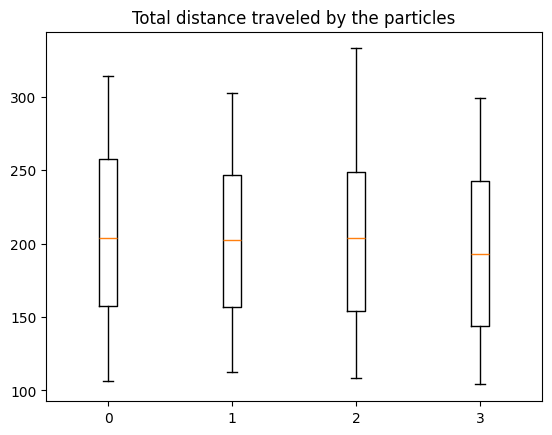

Mean time traveled by the particles
archpy:  1486.8068741923655
Layers mode:  1098.51327489875
New resolution mode factor 2:  1084.4015997684696
New resolution mode factor 4:  5017.776488445495
Median time traveled by the particles
archpy:  62.308865929525226
Layers mode:  158.53709588569814
New resolution mode factor 2:  118.96662660671987
New resolution mode factor 4:  228.9638969113443


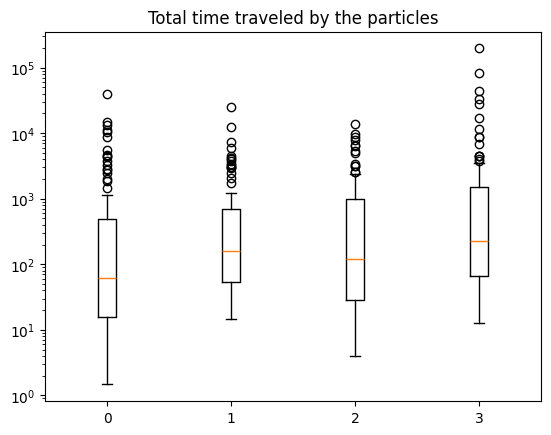

In [21]:
plt.title("Total distance traveled by the particles")

plt.boxplot([l_df_pi[0][i].cum_distance.iloc[-1] for i in range(n_loc)], positions=[0])
plt.boxplot([l_df_pi[1][i].cum_distance.iloc[-1] for i in range(n_loc)], positions=[1])
plt.boxplot([l_df_pi[2][i].cum_distance.iloc[-1] for i in range(n_loc)], positions=[2])
plt.boxplot([l_df_pi[3][i].cum_distance.iloc[-1] for i in range(n_loc)], positions=[3])

plt.show()

plt.title("Total time traveled by the particles")

plt.boxplot([l_df_pi[0][i].time.iloc[-1] for i in range(n_loc)], positions=[0])
plt.boxplot([l_df_pi[1][i].time.iloc[-1] for i in range(n_loc)], positions=[1])
plt.boxplot([l_df_pi[2][i].time.iloc[-1] for i in range(n_loc)], positions=[2])
plt.boxplot([l_df_pi[3][i].time.iloc[-1] for i in range(n_loc)], positions=[3])

print("Mean time traveled by the particles")
print("archpy: ", np.mean([l_df_pi[0][i].time.iloc[-1] for i in range(n_loc)]))
print("Layers mode: ", np.mean([l_df_pi[1][i].time.iloc[-1] for i in range(n_loc)]))
print("New resolution mode factor 2: ", np.mean([l_df_pi[2][i].time.iloc[-1] for i in range(n_loc)]))
print("New resolution mode factor 4: ", np.mean([l_df_pi[3][i].time.iloc[-1] for i in range(n_loc)]))

print("Median time traveled by the particles")
print("archpy: ", np.median([l_df_pi[0][i].time.iloc[-1] for i in range(n_loc)]))
print("Layers mode: ", np.median([l_df_pi[1][i].time.iloc[-1] for i in range(n_loc)]))
print("New resolution mode factor 2: ", np.median([l_df_pi[2][i].time.iloc[-1] for i in range(n_loc)]))
print("New resolution mode factor 4: ", np.median([l_df_pi[3][i].time.iloc[-1] for i in range(n_loc)]))

# set y axis to log scale
plt.yscale("log")
# plt.ylim(0, 1000)
plt.show()

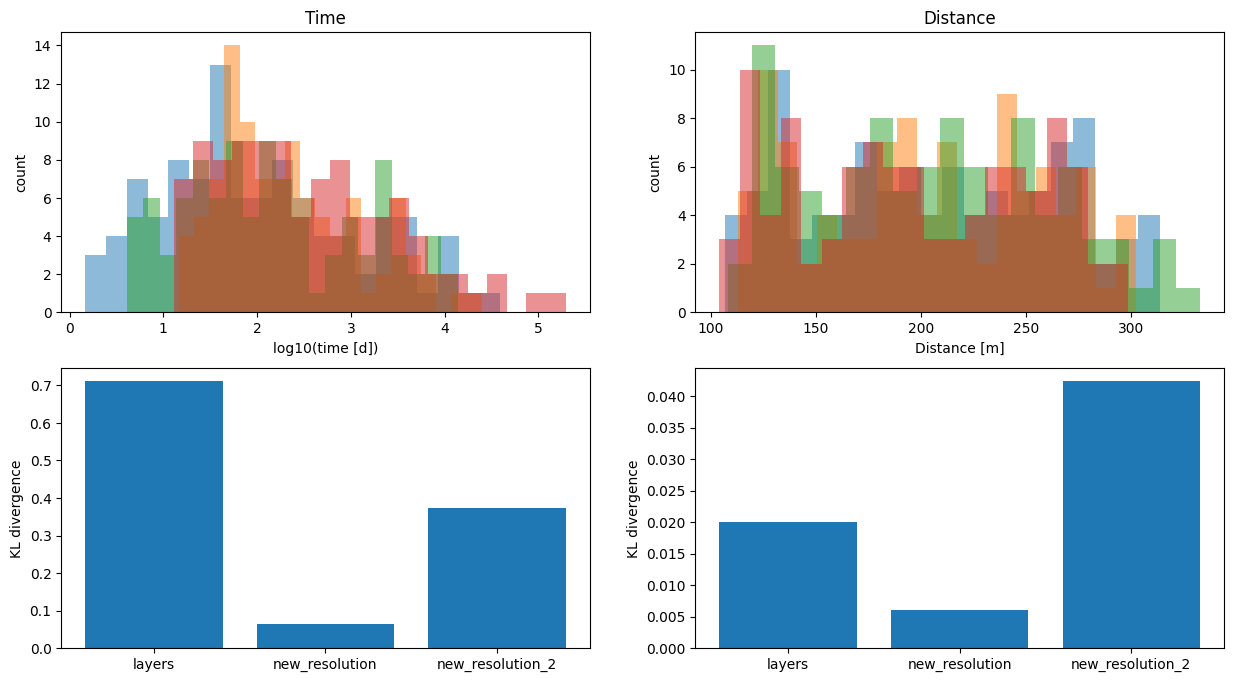

In [22]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))
import scipy.stats as stats


fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# TIME #
for o in range(4):
    ax[0, 0].hist(np.log10([l_df_pi[o][i].time.iloc[-1] for i in range(n_loc)]), bins=20, alpha=0.5, label=grid_modes[o])

ax[0, 0].set_xlabel("log10(time [d])")
ax[0, 0].set_ylabel("count")

# fit a kde to obtain probability distribution of each mode
kde = []
for o in range(4):
    kde.append(stats.gaussian_kde(np.log10([l_df_pi[o][i].time.iloc[-1] for i in range(n_loc)])))

x = np.linspace(-2, 10, 2000)
kl = []

for o in range(1, 4):
    tot_kde = kde[o](x).sum()
    kl.append(kl_divergence(kde[0](x), kde[o](x)) / tot_kde)

ax[1, 0].bar(grid_modes[1:], kl)
ax[1, 0].set_ylabel("KL divergence")

ax[0, 0].set_title("Time")
ax[0, 1].set_title("Distance")

# DISTANCE #
for o in range(4):
    ax[0, 1].hist([l_df_pi[o][i].cum_distance.iloc[-1] for i in range(n_loc)], bins=20, alpha=0.5, label=grid_modes[o])

ax[0, 1].set_xlabel("Distance [m]")
ax[0, 1].set_ylabel("count")

kde = []
for o in range(4):
    kde.append(stats.gaussian_kde([l_df_pi[o][i].cum_distance.iloc[-1] for i in range(n_loc)]))

x = np.linspace(0, 500, 2000)
kl = []

for o in range(1, 4):
    tot_kde = kde[o](x).sum()
    kl.append(kl_divergence(kde[0](x), kde[o](x)) / tot_kde)

ax[1, 1].bar(grid_modes[1:], kl)
ax[1, 1].set_ylabel("KL divergence")

plt.show()

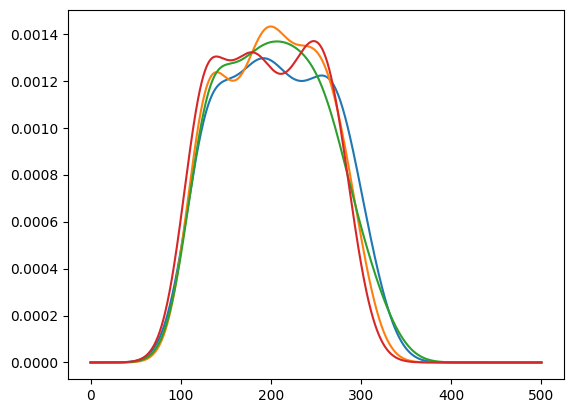

In [23]:
# plot kde
for o in range(4):
    tot_kde = kde[0](x).sum()
    plt.plot(x, kde[o](x) / tot_kde, label=grid_modes[o])

<BarContainer object of 3 artists>

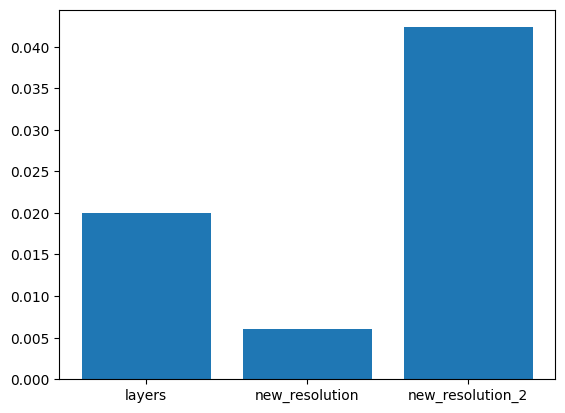

In [24]:
# compute kullback leibler divergence between the 3 modes
import scipy.stats as stats

# fit a kde to obtain probability distribution of each mode
kde = []
for o in range(4):
    kde.append(stats.gaussian_kde([l_df_pi[o][i].cum_distance.iloc[-1] for i in range(n_loc)]))

x = np.linspace(0, 500, 2000)
kl = []

for o in range(1, 4):
    tot_kde = kde[o](x).sum()
    kl.append(kl_divergence(kde[0](x), kde[o](x)) / tot_kde)

plt.bar(grid_modes[1:], kl)

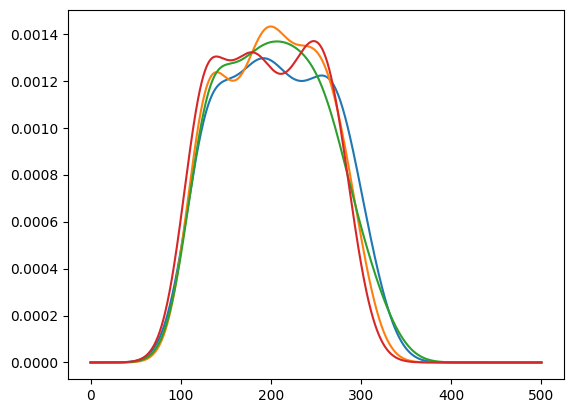

In [25]:
# plot kde
for o in range(4):
    tot_kde = kde[0](x).sum()
    plt.plot(x, kde[o](x) / tot_kde, label=grid_modes[o])

In [26]:
def plot_particle_facies_sequence(arch_table, df, plot_time=False, plot_distance=False, proportions=False):

    if plot_time and plot_distance:
        fig, ax = plt.subplots(2,1, figsize=(10, 1.5), dpi=200)
        axi = ax[0]
    elif plot_time or plot_distance:
        fig, axi = plt.subplots(1,1, figsize=(10, 0.5), dpi=200)
    plt.subplots_adjust(hspace=1.5)

    if proportions:
        colors_fa = []
        for col in df.columns:
            if col.split("_")[0] == "facies":
                id_fa = int(col.split("_")[-1])
                color_fa = archpy_flow.T1.get_facies_obj(ID=id_fa, type="ID").c
                colors_fa.append(color_fa)

    if plot_time:

        if proportions:
            df.set_index("time").iloc[:, -len(colors_fa):].plot(color=colors_fa, legend=False, ax=axi)
            axi.set_ylabel("Proportion")
            axi.set_xlabel("time [days]")
            axi.set_ylim(-.1, 1.1)

        else:
            dt = df["dt"]
            for i, (facies, time) in enumerate(zip(df["facies"], df["time"])):
                if i > 0:
                    axi.barh(0, dt[i], left=df["time"].loc[i-1], color=arch_table.get_facies_obj(ID=facies, type="ID").c)
                else:
                    axi.barh(0, dt[i], left=0, color=arch_table.get_facies_obj(ID=facies, type="ID").c, label=arch_table.get_facies_obj(ID=facies, type="ID").name)
            
            axi.set_xlim(0, df["time"].iloc[-1])
            axi.set_xlabel("Time (days)")
            axi.set_yticks([])

        if plot_distance:
            axi = ax[1]
    
    # plot facies function of the distance traveled
    if plot_distance:
        all_dist = df["distance"].values
        all_cum_dist = df["cum_distance"].values

        if proportions:
            df.set_index("cum_distance").iloc[:, -len(colors_fa):].plot(color=colors_fa, legend=False, ax=axi)
            axi.set_ylabel("Proportion")
            axi.set_xlabel("Distance [m]")
            axi.set_ylim(-.1, 1.1)

        else:

            for i in range(int(len(df["facies"]) - 1)):
                facies = df["facies"].iloc[i]
                width = all_dist[i+1]
                distance = all_cum_dist[i]
                axi.barh(0, width, left=distance, color=arch_table.get_facies_obj(ID=facies, type="ID").c)

        axi.set_xlim(0, all_cum_dist[-1])
        axi.set_xlabel("Distance (m)")
        axi.set_yticks([])

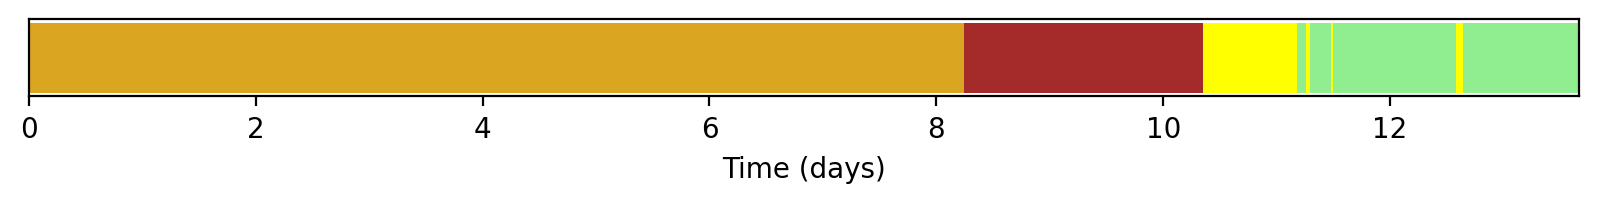

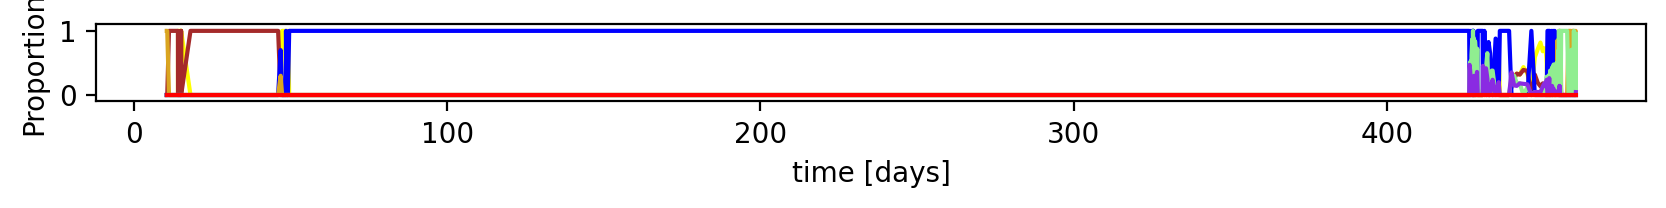

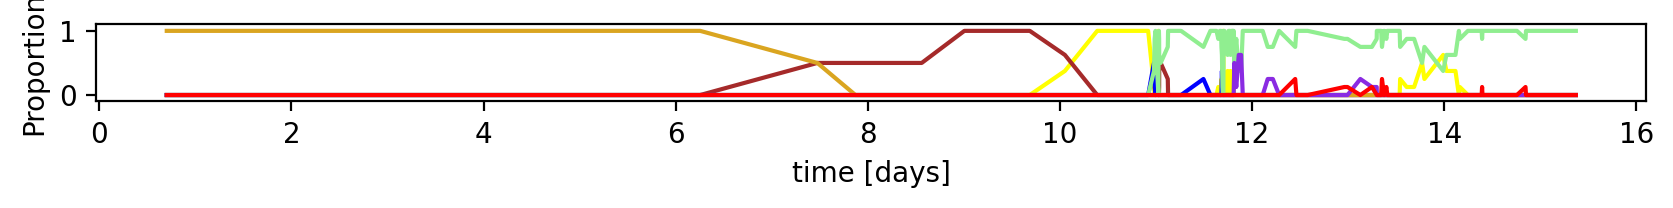

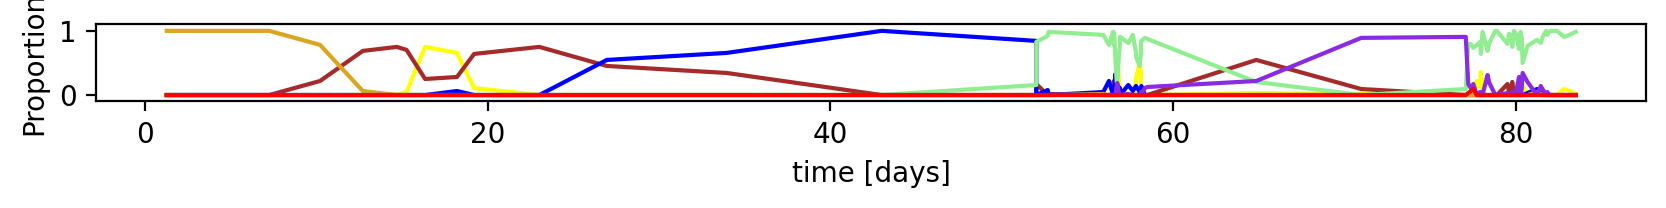

In [27]:
# from ArchPy.ap_mf import plot_particle_facies_sequence

i_mode = 0
i_particle = 1
plot_particle_facies_sequence(archpy_flow.T1, l_df_pi[i_mode][i_particle], plot_time=True, plot_distance=False)
i_mode=1
plot_particle_facies_sequence(archpy_flow.T1, l_df_pi[i_mode][i_particle], plot_time=True, plot_distance=False, proportions=True)
i_mode=2
plot_particle_facies_sequence(archpy_flow.T1, l_df_pi[i_mode][i_particle], plot_time=True, plot_distance=False, proportions=True)
i_mode=3
plot_particle_facies_sequence(archpy_flow.T1, l_df_pi[i_mode][i_particle], plot_time=True, plot_distance=False, proportions=True)


Text(0.5, 1.0, 'RMSE facies proportion')

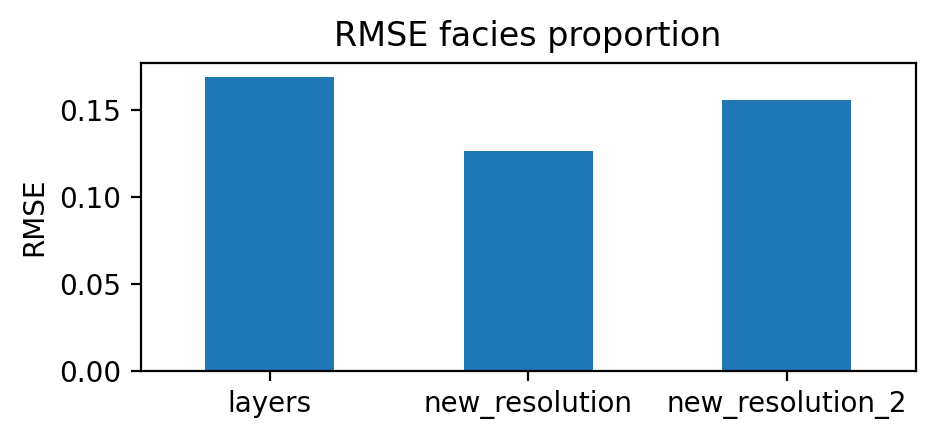

In [28]:
def get_facies_prop_time(df):
    o = 0
    for col in df.columns:
        if col.split("_")[0] == "facies":
            break
        o += 1

    return ((df.iloc[:, -o:].T * df["dt"].values).T).sum(axis=0) / df["dt"].sum()

all_particles_prop = {}

for i_particle in range(n_loc):
        
    df1 = l_df_pi[0][i_particle]
    facies_prop = {}
    for ifacies in [i.ID for i in archpy_flow.T1.get_all_facies()]:
        df1.loc[df1.facies == ifacies] 
        facies_prop["facies_prop_" + str(ifacies)] = df1.loc[df1.facies == ifacies, "dt"].sum() / df1["dt"].sum()

    df1_prop = pd.Series(facies_prop)
    df_prop = pd.DataFrame(df1_prop)
    for imode in range(1, 4):
        df_i_prop = get_facies_prop_time(l_df_pi[imode][i_particle])
        df_prop = pd.concat([df_prop, df_i_prop], axis=1)

    df_prop.columns = grid_modes
    df_res = np.sqrt(np.mean((df_prop.iloc[:, 1:].T - df_prop.archpy)**2, axis=1))
    all_particles_prop[i_particle] = df_res

fig, ax = plt.subplots(figsize=(1.5*len(grid_modes)-1, 2), dpi=200)
# pd.DataFrame(all_particles_prop).plot(kind="bar", legend=False, ax=ax)
pd.DataFrame(all_particles_prop).mean(axis=1).plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelrotation=0)
ax.set_ylabel("RMSE")
ax.set_title("RMSE facies proportion")

In [30]:
df_scores_particles

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
layers,0.318173,0.391548,0.051224,0.007288,0.184774,0.319702,0.275339,0.149258,0.048932,0.047455,...,0.207396,0.036918,0.196246,0.172991,0.092887,0.156395,0.127296,0.076417,0.329621,0.258893
new_resolution,0.020697,0.066008,0.051503,0.001490,0.076045,0.035994,0.169647,0.080893,0.108548,0.110800,...,0.145518,0.096763,0.174001,0.077204,0.102408,0.113660,0.164860,0.097945,0.214997,0.094164
new_resolution_2,0.123209,0.222503,0.066802,0.020292,0.061043,0.032313,0.092812,0.091896,0.037964,0.133594,...,0.229701,0.050280,0.055337,0.140087,0.052825,0.042742,0.095850,0.051474,0.280884,0.270393


(-15.0, -6.0)

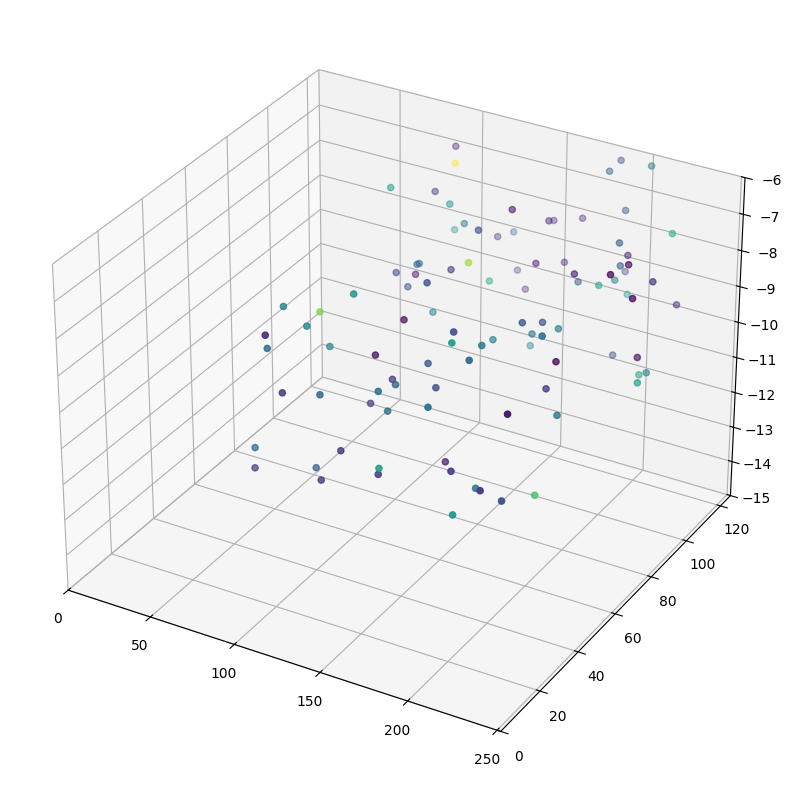

In [31]:
%matplotlib inline
df_scores_particles = pd.DataFrame(all_particles_prop)

# plot in 3D starting points of the particles and color them according to the score
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111, projection='3d')


ax.scatter(particles_loc_x, particles_loc_y, particles_loc_z, c=df_scores_particles.loc["new_resolution_2"], cmap="viridis")

plt.xlim(0, T1.get_xg()[-1])
plt.ylim(0, T1.get_yg()[-1])
ax.set_zlim(-15, -6)

In [32]:
print(np.corrcoef(df_scores_particles.loc["layers"], df_scores_particles.loc["new_resolution"]))
print(np.corrcoef(df_scores_particles.loc["layers"], df_scores_particles.loc["new_resolution_2"]))
print(np.corrcoef(df_scores_particles.loc["new_resolution_2"], df_scores_particles.loc["new_resolution"]))

[[1.         0.35613704]
 [0.35613704 1.        ]]
[[1.         0.47398407]
 [0.47398407 1.        ]]
[[1.         0.49064221]
 [0.49064221 1.        ]]


In [41]:
%matplotlib tk

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111, projection="3d")

for df in l_df_pi[0]:
    ax.plot(df["x"], df["y"], df["z"])
    
plt.xlim(0, T1.get_xg()[-1])
plt.ylim(0, T1.get_yg()[-1])
ax.set_zlim(-15, -5)
ax.set_aspect("equalxy")
plt.show()

In [34]:
%matplotlib tk
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

i_particle = 2
for df in [l_df_pi[0][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="k")
    # ax.scatter(df["x"], df["y"], df["z"], c=np.log10(df["time"]), cmap="viridis")
    print(df["time"].max())
for df in [l_df_pi[1][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="r")
    # ax.scatter(df["x"], df["y"], df["z"], c=df["time"], cmap="viridis")
    print(df["time"].max())
for df in [l_df_pi[2][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="b")
    # ax.scatter(df["x"], df["y"], df["z"], c=np.log10(df["time"]), cmap="viridis")
    print(df["time"].max())
for df in [l_df_pi[3][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="g")
    # ax.scatter(df["x"], df["y"], df["z"], c=np.log10(df["time"]), cmap="viridis")
    print(df["time"].max())
    
plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, -5)
ax.set_aspect("equalxy")
plt.show()

635.6665901412692
12617.820849684884
1050.4166263887687
32706.896771707383


In [35]:
%matplotlib inline

In [42]:
from scipy.spatial import distance
import numba 
from numba import jit

@jit()
def DTW(path1, path2, dist):
    """
    Compute the Frechet distance between two pathlines
    """
    
    # compute the distance between each point of the two pathlines
    # dist = distance.cdist(path1, path2)

    # compute frechet matrix
    MF = np.zeros(dist.shape)
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if i == 0 and j == 0:
                MF[i, j] = dist[i, j]
            elif i == 0:
                MF[i, j] = dist[i, j]
            elif j == 0:
                MF[i, j] = dist[i, j]
            else:
                MF[i, j] = dist[i, j] + min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1])

    return MF[-1, -1]

def frechet_distance(path1, path2, dist):

    # compute the distance between each point of the two pathlines
    # dist = distance.cdist(path1, path2)

    # compute frechet matrix
    MF = np.zeros(dist.shape)
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if i == 0 and j == 0:
                MF[i, j] = dist[i, j]
            elif i == 0:
                MF[i, j] = max(MF[i, j-1], dist[i, j])
            elif j == 0:
                MF[i, j] = max(MF[i-1, j], dist[i, j])
            else:
                MF[i, j] = max(min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1]), dist[i, j])
    
    return MF[-1, -1]

def hausdorff_distance(path1, path2):
    """
    Compute the Hausdorff distance between two pathlines
    """
    
    from scipy.spatial.distance import directed_hausdorff

    d1 = directed_hausdorff(path1, path2)
    return d1[0]

In [43]:
%matplotlib inline

In [40]:
import time
all_l_frec = []
all_l_haus = []
all_l_dtw = []
for imode in range(1, 4):
    l_frechet = []
    l_hausdorff = []
    l_dtw = []
    for i_particle in range(n_loc):
        path1 = l_df_pi[0][i_particle][["x", "y", "z"]].values
        path2 = l_df_pi[imode][i_particle][["x", "y", "z"]].values

        dist = distance.cdist(path1, path2)
        # frechet
        l_frechet.append(frechet_distance(path1, path2, dist))

        # hausdorff
        l_hausdorff.append(hausdorff_distance(path1, path2))

        path1 = l_df_pi[0][i_particle][["x", "y", "z", "time"]]
        path2 = l_df_pi[imode][i_particle][["x", "y", "z", "time"]]

        # dtw
        df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
        path1 = df_merge[["x_1", "y_1", "z_1"]].fillna(method="bfill")
        path2 = df_merge[["x_2", "y_2", "z_2"]].fillna(method="bfill")
        dist = distance.cdist(path1.values, path2.values)

        l_dtw.append(DTW(path1.values, path2.values, dist))
    
    all_l_frec.append(l_frechet)
    all_l_haus.append(l_hausdorff)
    all_l_dtw.append(l_dtw)

Text(0, 0.5, 'DTW distance')

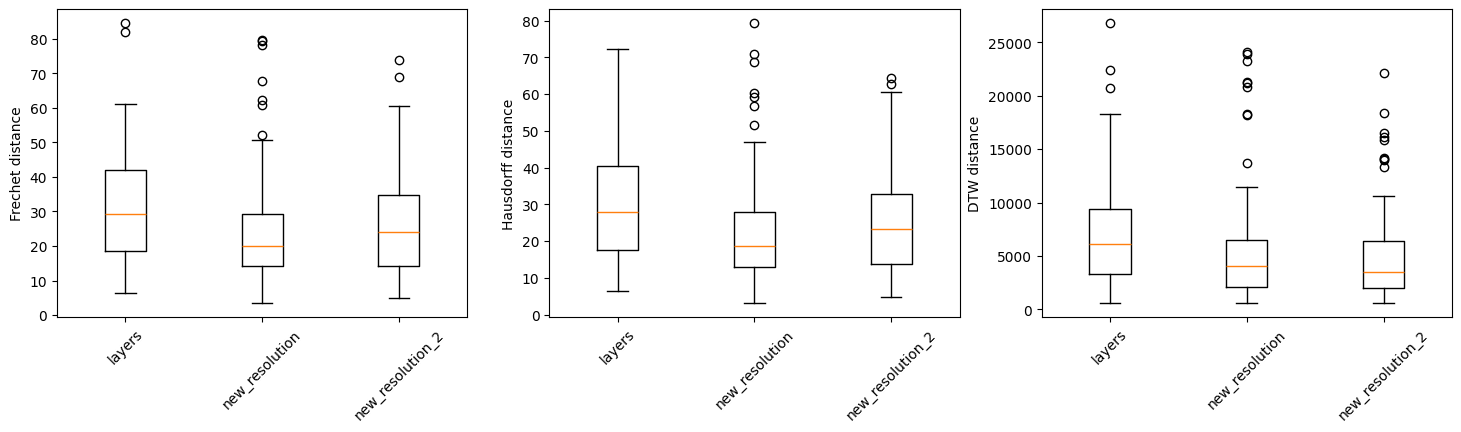

In [ ]:
# plot boxplots of the frechet, hausdorff and DTW distances
fig, ax = plt.subplots(1, 3, figsize=(6*(len(grid_modes)-1), 4))

ax[0].boxplot([all_l_frec[i] for i in range(len(grid_modes) - 1)])
ax[0].set_xticklabels(grid_modes[1:], rotation=45)
ax[0].set_ylabel("Frechet distance")

ax[1].boxplot([all_l_haus[i] for i in range(len(grid_modes) - 1)])
ax[1].set_xticklabels(grid_modes[1:], rotation=45)
ax[1].set_ylabel("Hausdorff distance")

ax[2].boxplot([all_l_dtw[i] for i in range(len(grid_modes) - 1)])
ax[2].set_xticklabels(grid_modes[1:], rotation=45)
ax[2].set_ylabel("DTW distance")

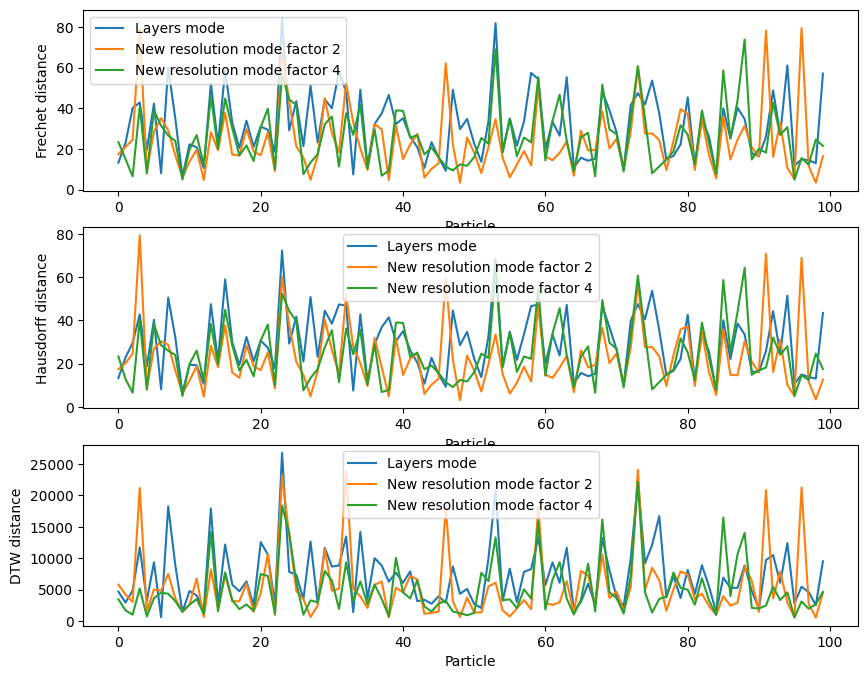

Frechet distance
Layers mode:  31.223074336099913
New resolution mode factor 2:  23.915493890186696
New resolution mode factor 4:  25.7547926117944
Hausdorff distance
Layers mode:  29.205628888585192
New resolution mode factor 2:  22.531875596014153
New resolution mode factor 4:  24.654769772442982
DTW distance
Layers mode:  7215.613349197334
New resolution mode factor 2:  5569.3931768740385
New resolution mode factor 4:  4940.912973859535


In [44]:
l_layer_frechet = all_l_frec[0]
l_new_res_frechet = all_l_frec[1]
l_new_res_2_frechet = all_l_frec[2]
l_layer_hausdorff = all_l_haus[0]
l_new_res_hausdorff = all_l_haus[1]
l_new_res_2_hausdorff = all_l_haus[2]
l_layer_dtw = all_l_dtw[0]
l_new_res_dtw = all_l_dtw[1]
l_new_res_2_dtw = all_l_dtw[2]

fig, ax = plt.subplots(3, 1, figsize=(10, 8))
ax[0].plot(l_layer_frechet, label="Layers mode")
ax[0].plot(l_new_res_frechet, label="New resolution mode factor 2")
ax[0].plot(l_new_res_2_frechet, label="New resolution mode factor 4")
ax[0].set_xlabel("Particle")
ax[0].set_ylabel("Frechet distance")
ax[0].legend()

ax[1].plot(l_layer_hausdorff, label="Layers mode")
ax[1].plot(l_new_res_hausdorff, label="New resolution mode factor 2")
ax[1].plot(l_new_res_2_hausdorff, label="New resolution mode factor 4")
ax[1].set_xlabel("Particle")
ax[1].set_ylabel("Hausdorff distance")
ax[1].legend()

ax[2].plot(l_layer_dtw, label="Layers mode")
ax[2].plot(l_new_res_dtw, label="New resolution mode factor 2")
ax[2].plot(l_new_res_2_dtw, label="New resolution mode factor 4")
ax[2].set_xlabel("Particle")
ax[2].set_ylabel("DTW distance")
ax[2].legend()

plt.show()

print("Frechet distance")
print("Layers mode: ", np.mean(l_layer_frechet))
print("New resolution mode factor 2: ", np.mean(l_new_res_frechet))
print("New resolution mode factor 4: ", np.mean(l_new_res_2_frechet))
print("Hausdorff distance")
print("Layers mode: ", np.mean(l_layer_hausdorff))
print("New resolution mode factor 2: ", np.mean(l_new_res_hausdorff))
print("New resolution mode factor 4: ", np.mean(l_new_res_2_hausdorff))
print("DTW distance")
print("Layers mode: ", np.mean(l_layer_dtw))
print("New resolution mode factor 2: ", np.mean(l_new_res_dtw))
print("New resolution mode factor 4: ", np.mean(l_new_res_2_dtw))

In [46]:
grid_modes[1:]

['layers', 'new_resolution', 'new_resolution_2']

In [472]:
# from scipy.spatial import distance

# def DTW(path1, path2):
#     """
#     Compute the Frechet distance between two pathlines
#     """
    
#     # compute the distance between each point of the two pathlines
#     dist = distance.cdist(path1, path2)

#     # compute frechet matrix
#     MF = np.zeros(dist.shape)
#     for i in range(dist.shape[0]):
#         for j in range(dist.shape[1]):
#             if i == 0 and j == 0:
#                 MF[i, j] = dist[i, j]
#             elif i == 0:
#                 MF[i, j] = dist[i, j]
#             elif j == 0:
#                 MF[i, j] = dist[i, j]
#             else:
#                 MF[i, j] = dist[i, j] + min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1])

#     return MF[-1, -1]

# def frechet_distance(path1, path2):

#     # compute the distance between each point of the two pathlines
#     dist = distance.cdist(path1, path2)

#     # compute frechet matrix
#     MF = np.zeros(dist.shape)
#     for i in range(dist.shape[0]):
#         for j in range(dist.shape[1]):
#             if i == 0 and j == 0:
#                 MF[i, j] = dist[i, j]
#             elif i == 0:
#                 MF[i, j] = max(MF[i, j-1], dist[i, j])
#             elif j == 0:
#                 MF[i, j] = max(MF[i-1, j], dist[i, j])
#             else:
#                 MF[i, j] = max(min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1]), dist[i, j])
    
#     return MF[-1, -1]

# def hausdorff_distance(path1, path2):
#     """
#     Compute the Hausdorff distance between two pathlines
#     """
    
#     from scipy.spatial.distance import directed_hausdorff

#     d1 = directed_hausdorff(path1, path2)
#     return d1[0]

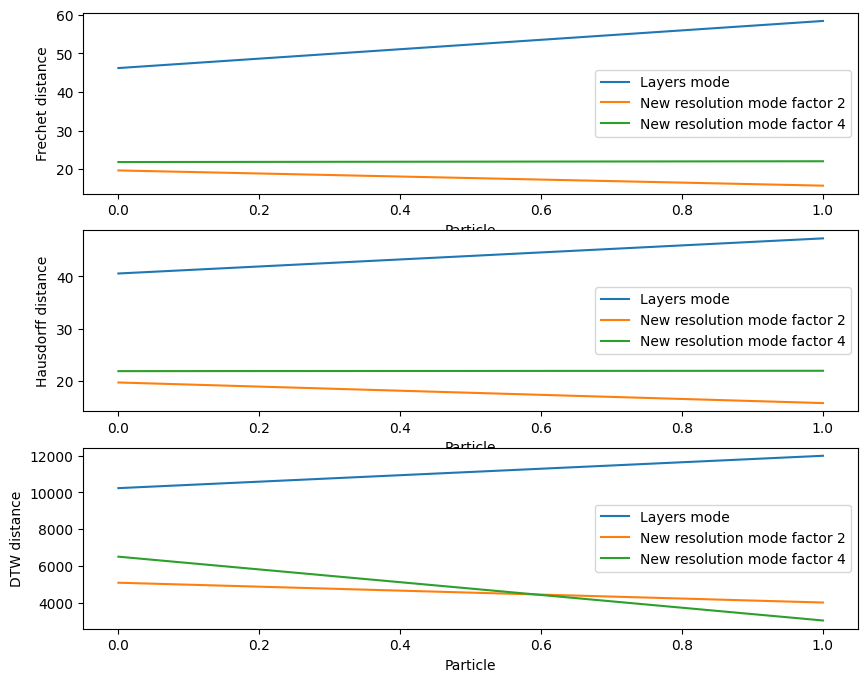

Frechet distance
Layers mode:  52.3000929791524
New resolution mode factor 2:  17.68049957044814
New resolution mode factor 4:  21.932421575464343
Hausdorff distance
Layers mode:  43.913334185907246
New resolution mode factor 2:  17.68049957044814
New resolution mode factor 4:  21.864615702867447
DTW distance
Layers mode:  11110.106691496625
New resolution mode factor 2:  4553.6244940773995
New resolution mode factor 4:  4773.331309131251


In [474]:
# # write a function to compute the frechet distance between two pathlines
# l_layer_frechet = []
# l_new_res_frechet = []
# l_new_res_2_frechet = []
# l_layer_hausdorff = []
# l_new_res_hausdorff = []
# l_new_res_2_hausdorff = []
# l_layer_dtw = []
# l_new_res_dtw = []
# l_new_res_2_dtw = []
# for i_particle in [8, 9]:
#     # compute frechet and hausdorffdistance
#     path1 = l_df_pi[0][i_particle][["x", "y", "z"]].values
#     path2 = l_df_pi[1][i_particle][["x", "y", "z"]].values
#     l_layer_frechet.append(frechet_distance(path1, path2))
#     l_layer_hausdorff.append(hausdorff_distance(path1, path2))

#     path2 = l_df_pi[2][i_particle][["x", "y", "z"]].values
#     l_new_res_frechet.append(frechet_distance(path1, path2))
#     l_new_res_hausdorff.append(hausdorff_distance(path1, path2))
    
#     path2 = l_df_pi[3][i_particle][["x", "y", "z"]].values
#     l_new_res_2_frechet.append(frechet_distance(path1, path2))
#     l_new_res_2_hausdorff.append(hausdorff_distance(path1, path2))

#     # # DTW
#     path1 = l_df_pi[0][i_particle][["x", "y", "z", "time"]]

#     path2 = l_df_pi[1][i_particle][["x", "y", "z", "time"]]

#     # # merge the two dataframes on time
#     df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
#     path1 = df_merge[["x_1", "y_1", "z_1"]].fillna(method="bfill")
#     path2 = df_merge[["x_2", "y_2", "z_2"]].fillna(method="bfill")

#     l_layer_dtw.append(DTW(path1.values, path2.values))

#     path1 = l_df_pi[0][i_particle][["x", "y", "z", "time"]]

#     path2 = l_df_pi[2][i_particle][["x", "y", "z", "time"]]

#     # # merge the two dataframes on time
#     df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
#     path1 = df_merge[["x_1", "y_1", "z_1"]].fillna(method="bfill")
#     path2 = df_merge[["x_2", "y_2", "z_2"]].fillna(method="bfill")
#     l_new_res_dtw.append(DTW(path1.values, path2.values))

#     path1 = l_df_pi[0][i_particle][["x", "y", "z", "time"]]

#     path2 = l_df_pi[3][i_particle][["x", "y", "z", "time"]]

#     # # merge the two dataframes on time
#     df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
#     path1 = df_merge[["x_1", "y_1", "z_1"]].fillna(method="bfill")
#     path2 = df_merge[["x_2", "y_2", "z_2"]].fillna(method="bfill")
#     l_new_res_2_dtw.append(DTW(path1.values, path2.values))

# fig, ax = plt.subplots(3, 1, figsize=(10, 8))
# ax[0].plot(l_layer_frechet, label="Layers mode")
# ax[0].plot(l_new_res_frechet, label="New resolution mode factor 2")
# ax[0].plot(l_new_res_2_frechet, label="New resolution mode factor 4")
# ax[0].set_xlabel("Particle")
# ax[0].set_ylabel("Frechet distance")
# ax[0].legend()

# ax[1].plot(l_layer_hausdorff, label="Layers mode")
# ax[1].plot(l_new_res_hausdorff, label="New resolution mode factor 2")
# ax[1].plot(l_new_res_2_hausdorff, label="New resolution mode factor 4")
# ax[1].set_xlabel("Particle")
# ax[1].set_ylabel("Hausdorff distance")
# ax[1].legend()

# ax[2].plot(l_layer_dtw, label="Layers mode")
# ax[2].plot(l_new_res_dtw, label="New resolution mode factor 2")
# ax[2].plot(l_new_res_2_dtw, label="New resolution mode factor 4")
# ax[2].set_xlabel("Particle")
# ax[2].set_ylabel("DTW distance")
# ax[2].legend()

# plt.show()

# print("Frechet distance")
# print("Layers mode: ", np.mean(l_layer_frechet))
# print("New resolution mode factor 2: ", np.mean(l_new_res_frechet))
# print("New resolution mode factor 4: ", np.mean(l_new_res_2_frechet))
# print("Hausdorff distance")
# print("Layers mode: ", np.mean(l_layer_hausdorff))
# print("New resolution mode factor 2: ", np.mean(l_new_res_hausdorff))
# print("New resolution mode factor 4: ", np.mean(l_new_res_2_hausdorff))
# print("DTW distance")
# print("Layers mode: ", np.mean(l_layer_dtw))
# print("New resolution mode factor 2: ", np.mean(l_new_res_dtw))
# print("New resolution mode factor 4: ", np.mean(l_new_res_2_dtw))

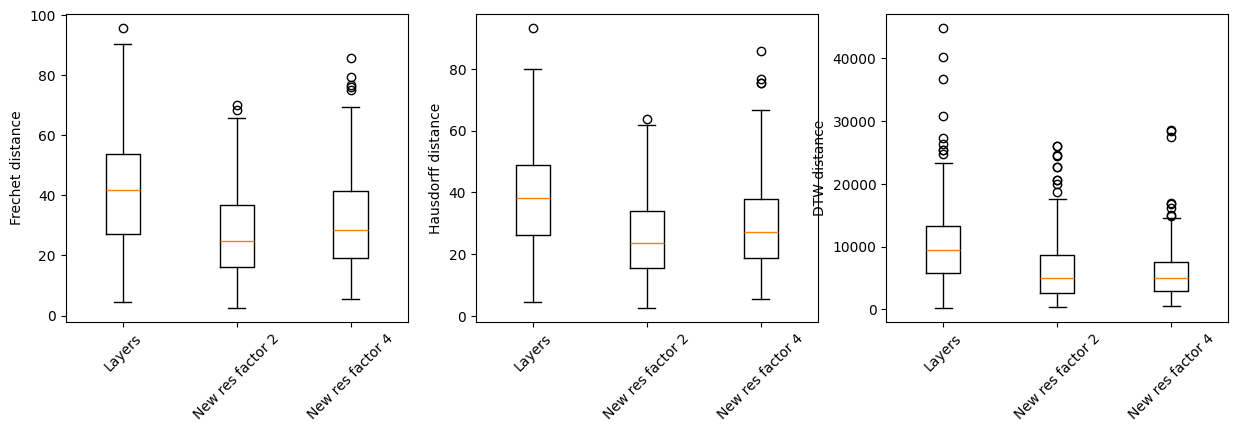

In [194]:

# plot boxplots of the frechet, hausdorff and DTW distances
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].boxplot([l_layer_frechet, l_new_res_frechet, l_new_res_2_frechet])
ax[0].set_xticklabels(["Layers", "New res factor 2", "New res factor 4"], rotation=45)
ax[0].set_ylabel("Frechet distance")

ax[1].boxplot([l_layer_hausdorff, l_new_res_hausdorff, l_new_res_2_hausdorff])
ax[1].set_xticklabels(["Layers", "New res factor 2", "New res factor 4"], rotation=45)
ax[1].set_ylabel("Hausdorff distance")

ax[2].boxplot([l_layer_dtw, l_new_res_dtw, l_new_res_2_dtw])
ax[2].set_xticklabels(["Layers", "New res factor 2", "New res factor 4"], rotation=45)
ax[2].set_ylabel("DTW distance")

plt.show()

In [212]:
idx_min = np.argmin(l_new_res_2_dtw)

In [213]:
%matplotlib tk
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

i_particle = idx_min
for df in [l_df_pi[0][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="k")
# for df in [l_df_pi[1][i_particle]]:
#     ax.plot(df["x"], df["y"], df["z"], color="r")
for df in [l_df_pi[2][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="b")
for df in [l_df_pi[3][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="g")
    
plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, -5)
ax.set_aspect("equalxy")
plt.show()

In [145]:
plt.close()

In [76]:
%matplotlib inline